In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

import warnings
warnings.filterwarnings(action='ignore')  # 경고 메시지를 무시



In [2]:
df_one = pd.read_csv('data/성별_연령별_교육정도별_1인가구_일반가구_시군구_20250625112008.csv')
df_one_2024 = df_one.iloc[3]
df_one_2024

행정구역별(시군구)        전국
성별                 계
연령별            20~24
2020          496119
2020.1             -
2020.2          2507
2020.3         84389
2020.4         92363
2020.5        307180
2020.6          9680
2020.7             -
Name: 3, dtype: object

In [3]:

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'



In [4]:
hospital_df = pd.read_csv('data/1.병원정보서비스-2025.3.csv')
hospital_df.head()

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkNDgxOTYxIzIxIyQxIy...,(VOM)봄안과의원,31,의원,230000,대구,230002,대구동구,율하동,41151,...,0,0,0,0,0,0,0,0,128.691894,35.869852
1,JDQ4MTAxMiM1MSMkMSMkMCMkOTkkNTgxOTYxIzExIyQxIy...,(복지)예사랑병원,29,정신병원,210000,부산,210006,부산서구,아미동2가,49249,...,0,0,0,0,0,0,0,0,129.013310,35.097325
2,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkNDgxOTYxIzUxIyQxIy...,(사) 경찰공제회 포항의원,31,의원,370000,경북,370701,포항남구,오천읍,37895,...,0,0,0,0,0,0,0,0,129.392904,35.942317
3,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNDgxOTYxIzIxIyQxIy...,(사)경찰공제회남부의원,31,의원,220000,인천,220006,인천남동구,고잔동,21689,...,0,0,0,0,0,0,0,0,126.708861,37.384910
4,JDQ4MTYyMiM1MSMkMiMkMCMkMDAkMzgxMzUxIzQxIyQxIy...,(사)대한결핵협회경기도지부부설복십자의원,31,의원,310000,경기,310603,수원팔달구,매산로3가,16456,...,0,0,0,0,0,0,0,0,127.008966,37.271984


In [5]:
# 필요한 세 개의 컬럼만 추출
hospitals_simple = hospital_df[["요양기관명", "종별코드명", "시도코드명"]]

# 중복 제거 후 출력
hospitals_simple_unique = hospitals_simple.drop_duplicates()

hospitals_simple_unique.describe()


,요양기관명,종별코드명,시도코드명
count,68709,68709,68709
unique,54806,15,17
top,블리비의원,의원,서울
freq,17,33073,16221


In [6]:
# '종별코드명'에서 '정신'이 포함된 의료기관만 필터링
hospitals_simple_unique = hospitals_simple[hospital_df['종별코드명'].str.contains("정신", na=False)]

hospitals_simple_unique.describe()


,요양기관명,종별코드명,시도코드명
count,262,262,262
unique,258,1,17
top,연세서울병원,정신병원,경기
freq,2,262,53


In [7]:
# '종별코드명'에서 '정신'이 포함된 의료기관만 필터링
mental_hospitals = hospitals_simple[hospital_df['요양기관명'].str.contains("정신", na=False)]

mental_hospitals.describe()

,요양기관명,종별코드명,시도코드명
count,1779,1779,1779
unique,1490,3,17
top,한음한방신경정신과한의원,의원,서울
freq,23,1728,633


In [8]:
# 시도별 정신병원 수 세기
mental_hospital_counts = mental_hospitals["시도코드명"].value_counts().reset_index()
mental_hospital_counts.columns = ["시도", "정신병원_개수"]

# 가나다순 정렬
mental_hospital_counts = mental_hospital_counts.sort_values(by="시도").reset_index(drop=True)

mental_hospital_counts


,시도,정신병원_개수
0,강원,24
1,경기,371
2,경남,64
3,경북,33
4,광주,50
5,대구,89
6,대전,74
7,부산,153
8,서울,633
9,세종시,15


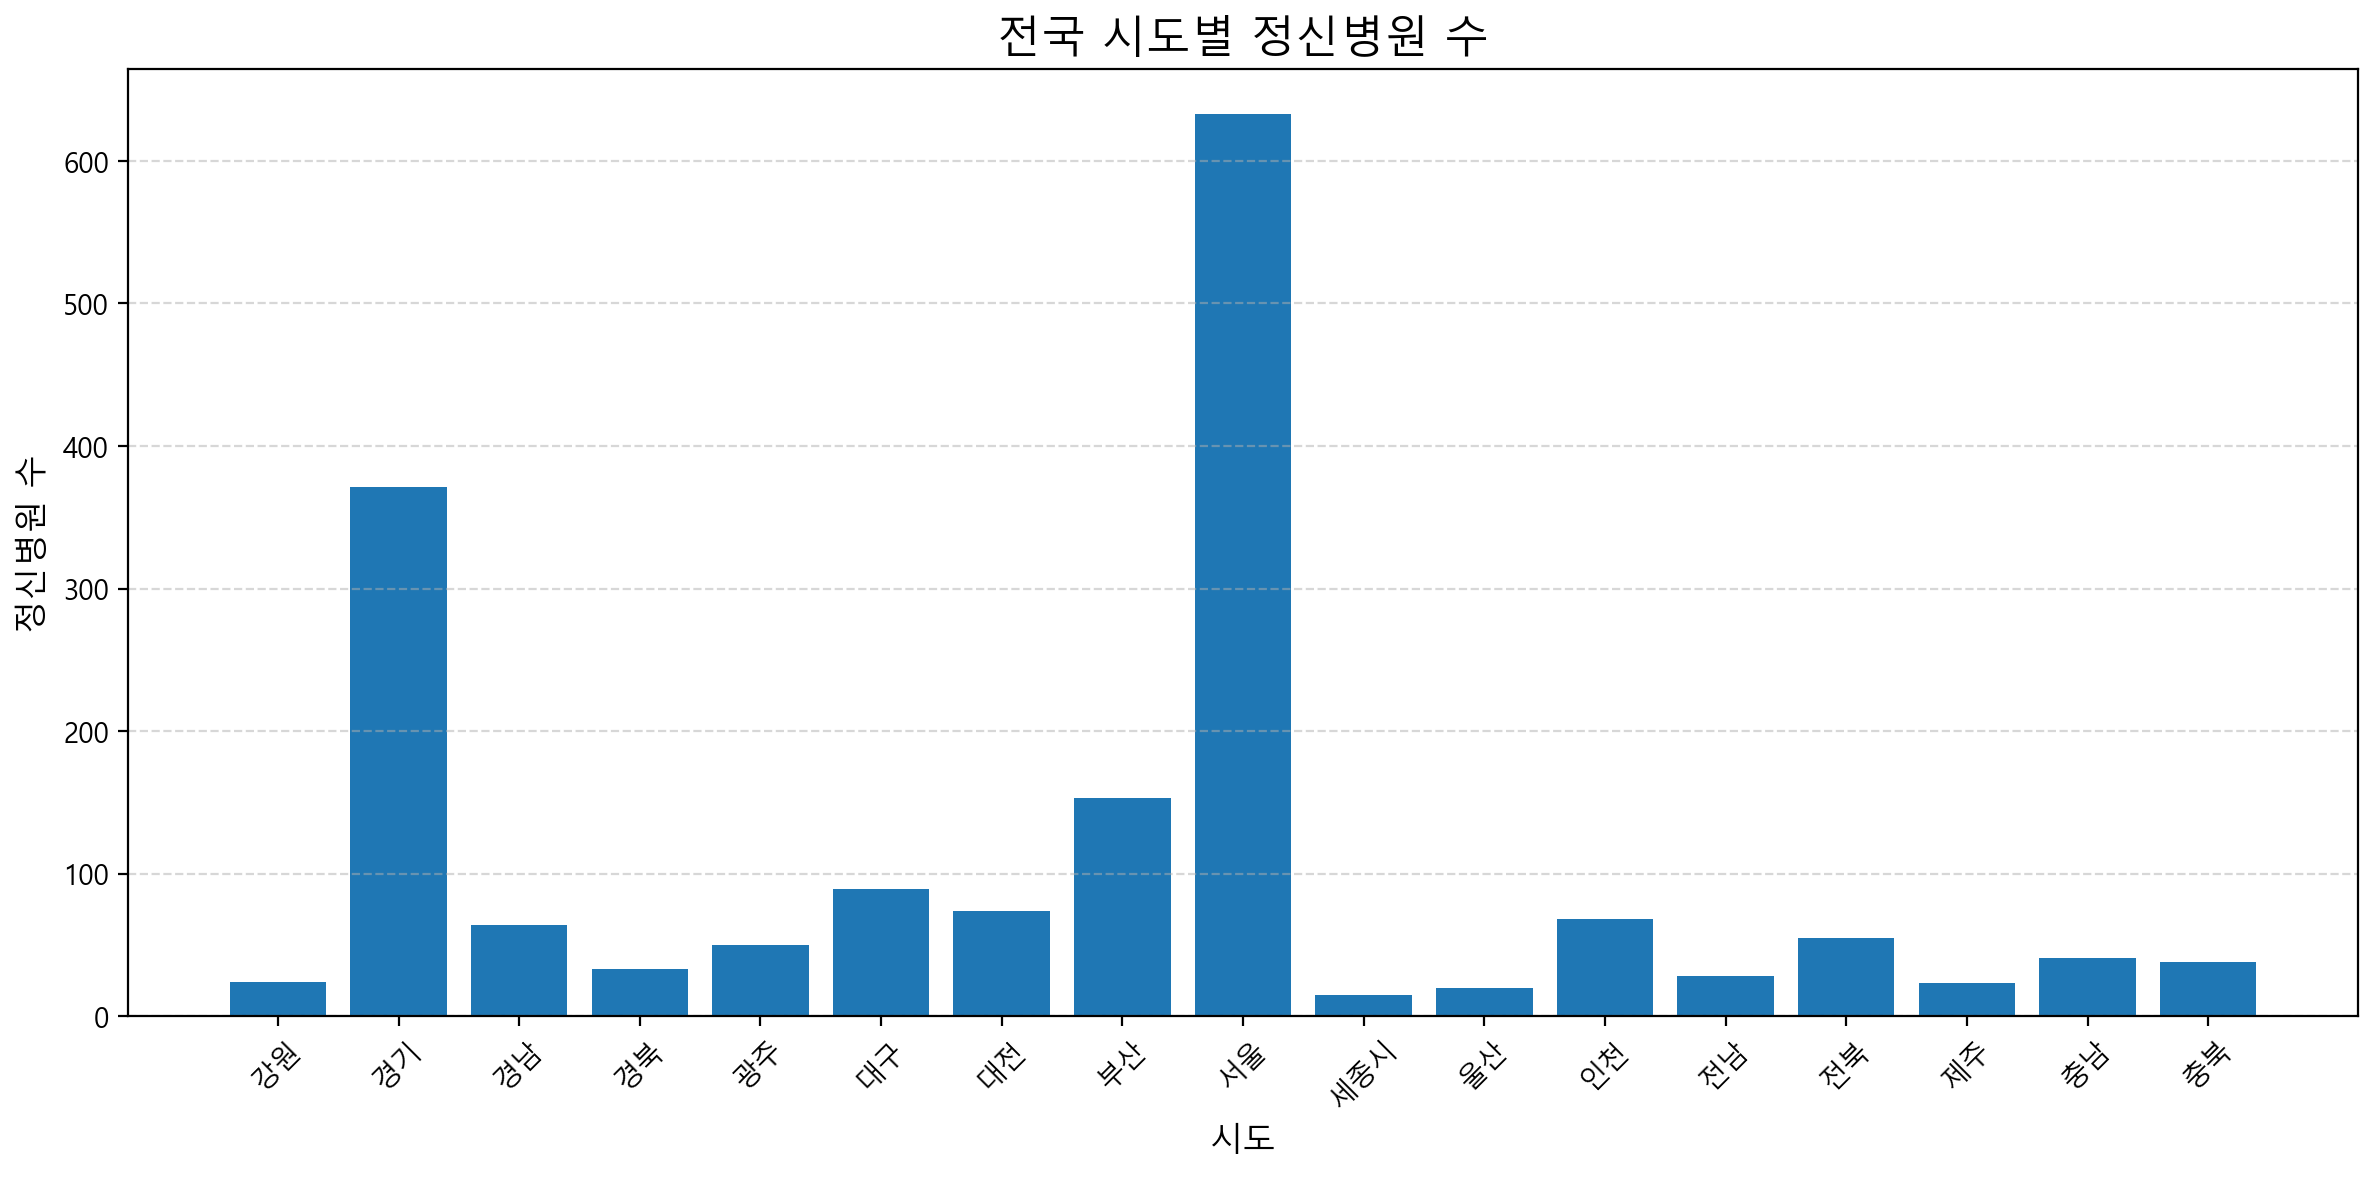

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(mental_hospital_counts["시도"], mental_hospital_counts["정신병원_개수"])

plt.title("전국 시도별 정신병원 수", fontsize=16)
plt.xlabel("시도", fontsize=12)
plt.ylabel("정신병원 수", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


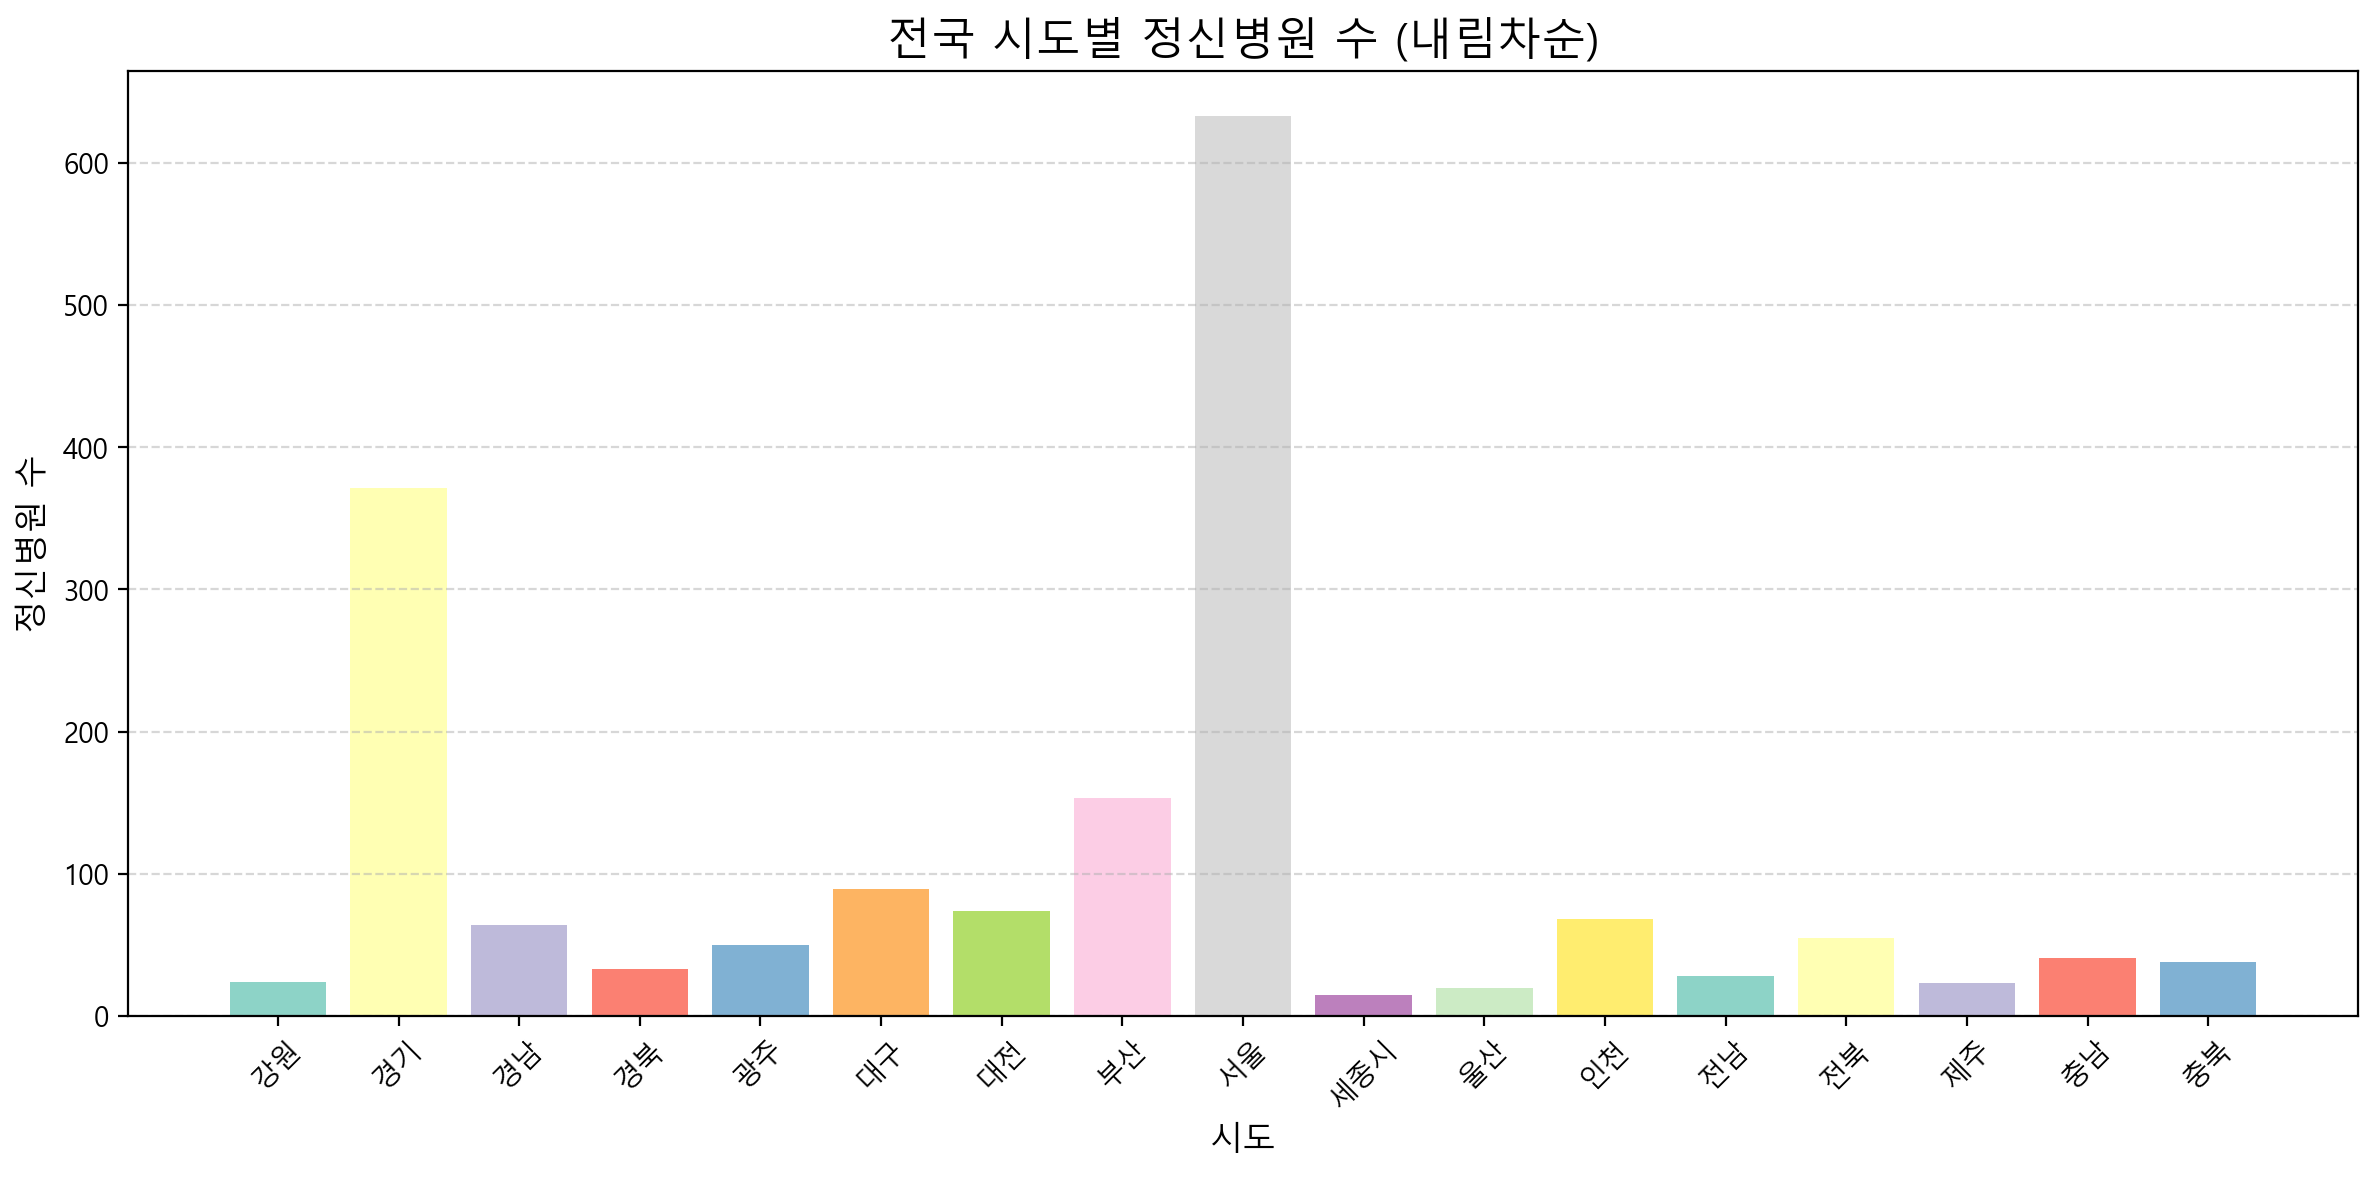

In [11]:


# 색상 지정: 시도 수만큼 색상 생성
colors = sns.color_palette("Set3", len(mental_hospital_counts))

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(mental_hospital_counts["시도"], mental_hospital_counts["정신병원_개수"], color=colors)

plt.title("전국 시도별 정신병원 수 (내림차순)", fontsize=16)
plt.xlabel("시도", fontsize=12)
plt.ylabel("정신병원 수", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
# 초기화된 환경에서 다시 mental_hospital_counts와 region_sum_sorted 재정의

# 이전 정신병원 수 데이터 (직접 정의)
mental_hospital_counts = pd.DataFrame({
    '시도': ['경기', '경남', '경북', '서울', '부산', '인천', '전남', '전북', '충남', '충북', '대구', '광주', '대전', '강원', '울산', '세종', '제주'],
    '정신병원_개수': [53, 30, 26, 13, 13, 11, 10, 9, 9, 9, 8, 8, 8, 9, 7, 3, 3]
})

# region_sum 예시 정의 (20~29세 1인가구 수, 지역명은 시도 기준)
region_sum_sorted = pd.DataFrame({
    '지역': ['서울', '경기', '부산', '대구', '인천', '경남', '광주', '대전', '충북', '강원', '경북', '전북', '충남', '전남', '울산', '세종', '제주'],
    '1인가구': [170000, 150000, 80000, 75000, 70000, 68000, 50000, 48000, 46000, 45000, 43000, 40000, 39000, 37000, 32000, 30000, 28000]
})

# 병합
merged_df = pd.merge(region_sum_sorted, mental_hospital_counts, left_on="지역", right_on="시도", how="inner")

# 상관계수 계산
correlation = merged_df["1인가구"].corr(merged_df["정신병원_개수"])



correlation


np.float64(0.5842445337326614)

In [13]:
pop_df = pd.read_csv('data/우울감경험률_2008-2024_.csv', encoding="utf-8")
pop_df.head(10)

,18. 우울감 경험률,Unnamed: 1,Unnamed: 2,정의,최근 1년 동안 연속적으로 2주 이상 일상생활에 지장이 있을 정도의 우울감(슬픔이나 절망감 등)을 경험한 사람의 분율,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,분자,최근 1년 동안 연속적으로 2주 이상 일상생활에 지장이 있을 정도의 우울감(슬픔이나...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,분모,조사대상 응답자 수,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,비고,%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,부록표 1-18. 시·도별 성·연령별 우울감 경험률 추이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: %(표준오차))
8,구분,NaN,NaN,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,95% CI
9,서울,N,(명),"21,916","23,171","22,871","23,109","23,055","23,135","23,024",...,"22,933","22,945","22,903","22,909","22,912","22,923","22,941","22,928","22,904",NaN


In [14]:
# 0~8행 제거한 새로운 데이터프레임 생성
pop_df_cleaned = pop_df.iloc[9:].reset_index(drop=True)

# 상위 5행 확인
pop_df_cleaned.head()


,18. 우울감 경험률,Unnamed: 1,Unnamed: 2,정의,최근 1년 동안 연속적으로 2주 이상 일상생활에 지장이 있을 정도의 우울감(슬픔이나 절망감 등)을 경험한 사람의 분율,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,서울,N,(명),"21,916","23,171","22,871","23,109","23,055","23,135","23,024",...,"22,933","22,945","22,903","22,909","22,912","22,923","22,941","22,928","22,904",NaN
1,NaN,전체,(조율),8.2(0.2),7.9(0.2),6.8(0.2),7.0(0.2),6.8(0.2),7.1(0.2),8.3(0.2),...,7.0(0.2),7.2(0.2),5.1(0.2),6.5(0.2),6.3(0.2),7.0(0.2),7.3(0.2),8.4(0.2),7.5(0.2),7.1-7.9
2,NaN,NaN,(표준화율),8.1(0.2),7.8(0.2),6.7(0.2),6.9(0.2),6.7(0.2),7.0(0.2),8.1(0.2),...,6.9(0.2),7.1(0.2),4.9(0.2),6.5(0.2),6.3(0.2),6.8(0.2),7.1(0.2),8.3(0.2),7.3(0.2),6.9-7.8
3,NaN,남,NaN,5.3(0.2),5.3(0.2),4.6(0.2),4.9(0.2),4.9(0.2),5.0(0.2),6.2(0.3),...,5.4(0.2),5.6(0.2),3.6(0.2),5.0(0.2),4.8(0.2),5.2(0.2),5.3(0.2),6.3(0.3),6.0(0.3),5.5-6.5
4,NaN,여,NaN,10.9(0.3),10.3(0.3),9.0(0.3),9.1(0.3),8.7(0.3),9.1(0.3),10.3(0.3),...,8.4(0.3),8.7(0.3),6.4(0.2),8.0(0.3),7.7(0.3),8.6(0.3),9.1(0.3),10.2(0.3),8.8(0.3),8.3-9.4


In [15]:
# 열 이름 재지정
pop_df_cleaned.columns = [
    "구분", "", "", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015",
    "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "95% CI"
]

# 결과 미리보기
pop_df_cleaned.head()


,구분,,,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,95% CI
0,서울,N,(명),"21,916","23,171","22,871","23,109","23,055","23,135","23,024",...,"22,933","22,945","22,903","22,909","22,912","22,923","22,941","22,928","22,904",NaN
1,NaN,전체,(조율),8.2(0.2),7.9(0.2),6.8(0.2),7.0(0.2),6.8(0.2),7.1(0.2),8.3(0.2),...,7.0(0.2),7.2(0.2),5.1(0.2),6.5(0.2),6.3(0.2),7.0(0.2),7.3(0.2),8.4(0.2),7.5(0.2),7.1-7.9
2,NaN,NaN,(표준화율),8.1(0.2),7.8(0.2),6.7(0.2),6.9(0.2),6.7(0.2),7.0(0.2),8.1(0.2),...,6.9(0.2),7.1(0.2),4.9(0.2),6.5(0.2),6.3(0.2),6.8(0.2),7.1(0.2),8.3(0.2),7.3(0.2),6.9-7.8
3,NaN,남,NaN,5.3(0.2),5.3(0.2),4.6(0.2),4.9(0.2),4.9(0.2),5.0(0.2),6.2(0.3),...,5.4(0.2),5.6(0.2),3.6(0.2),5.0(0.2),4.8(0.2),5.2(0.2),5.3(0.2),6.3(0.3),6.0(0.3),5.5-6.5
4,NaN,여,NaN,10.9(0.3),10.3(0.3),9.0(0.3),9.1(0.3),8.7(0.3),9.1(0.3),10.3(0.3),...,8.4(0.3),8.7(0.3),6.4(0.2),8.0(0.3),7.7(0.3),8.6(0.3),9.1(0.3),10.2(0.3),8.8(0.3),8.3-9.4


In [16]:
# '구분' 열에서 시도 이름이 포함된 행만 필터링
# 대한민국의 17개 시도 리스트
sido_list = [
    "서울", "부산", "대구", "인천", "광주", "대전", "울산", "세종",
    "경기", "강원", "충북", "충남", "전북", "전남", "경북", "경남", "제주"
]

# pop_df_cleaned에서 시도명만 포함된 행 추출
sido_only_df = pop_df_cleaned[pop_df_cleaned["구분"].isin(sido_list)].reset_index(drop=True)

sido_only_df.head()


,구분,,,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,95% CI
0,서울,N,(명),"21,916","23,171","22,871","23,109","23,055","23,135","23,024",...,"22,933","22,945","22,903","22,909","22,912","22,923","22,941","22,928","22,904",NaN
1,부산,N,(명),"14,272","15,071","14,663","14,639","14,611","14,599","14,577",...,"14,530","14,521","14,515","14,509","14,502","14,508","14,511","14,511","14,515",NaN
2,대구,N,(명),"6,977","7,335","7,300","7,327","7,326","7,334","7,332",...,"7,302","7,310","7,302","7,289","7,317","7,326","7,314","8,183","8,170",NaN
3,인천,N,(명),"8,284","9,024","9,048","9,028","9,000","9,022","9,004",...,"8,977","8,982","8,977","8,972","8,975","8,975","8,976","8,977","8,975",NaN
4,광주,N,(명),"4,431","4,824","4,647","4,632","4,646","4,643","4,619",...,"4,596","4,582","4,564","4,567","4,615","4,602","4,564","4,566","4,566",NaN


In [17]:
# 2023년 데이터만 추출
sido_2023_df = sido_only_df[["구분", "2023"]].copy()
sido_2023_df.columns = ["시도", "2023_우울감경험률"]

sido_2023_df

,시도,2023_우울감경험률
0,서울,"22,928"
1,부산,"14,511"
2,대구,"8,183"
3,인천,"8,977"
4,광주,"4,566"
5,대전,"4,588"
6,울산,"4,554"
7,세종,920
8,경기,"43,642"
9,강원,"15,816"


In [18]:
df_1 = pd.read_csv('data/성_및_연령별_1인가구__시군구.csv', encoding="cp949")
df_1

,행정구역별(시군구),연령별,2023,2023.1,2023.2
0,행정구역별(시군구),연령별,1인가구,남자,여자
1,전국,합계,7829035,3921561,3907474
2,전국,20세 미만,48486,22706,25780
3,전국,20~24,494745,222510,272235
4,전국,25~29,910457,489169,421288
...,...,...,...,...,...
332,제주특별자치도,65~69,7754,3491,4263
333,제주특별자치도,70~74,4955,1865,3090
334,제주특별자치도,75~79,4115,1208,2907
335,제주특별자치도,80~84,3451,708,2743


In [19]:
# 조건: 연령별 == '20~24' & 전국 제외
filtered = df_1[
    (df_1['연령별'] == '20~24') &
    (df_1['행정구역별(시군구)'] != '전국')
][['행정구역별(시군구)', '2023']].copy()

# 숫자형 변환
filtered['2023'] = filtered['2023'].astype(str).str.replace(",", "").astype(int)

# 시도명 추출
filtered['시도'] = filtered['행정구역별(시군구)'].str.extract(r'(^\S+?[시도])')

# 시도별 합계
sido_grouped = filtered.groupby('시도')['2023'].sum().reset_index()
sido_grouped.columns = ['시도', '20~24세_1인가구수']

# 결과 확인
sido_grouped

,시도,20~24세_1인가구수
0,강원특별자치도,19720
1,경기도,74070
2,경상남도,18665
3,경상북도,29013
4,광주광역시,17670
5,대구광역시,22708
6,대전광역시,32554
7,부산광역시,38614
8,서울특별시,132540
9,세종특별자치시,6211


In [28]:
# 시도 이름 정규화 함수 정의
def normalize_sido_name(name):
    name = str(name)
    name = name.replace("특별시", "").replace("광역시", "").replace("도특별자치", "").replace("특별자치시","")
    name = name.replace("북도", "").replace("특별자치도", "")
    name = name.replace("전라남도","전남").replace("전라북도","전북")
    name = name.replace("충청남도","충남").replace("충청북도","충북")
    name = name.replace("경상남도", "경남").replace("경상북도", "경북")
    return name.strip()

# 각 데이터프레임에 정규화된 시도명 컬럼 추가
sido_grouped['시도_정규화'] = sido_grouped['시도'].apply(normalize_sido_name)
mental_hospital_counts['시도_정규화'] = mental_hospital_counts['시도'].apply(normalize_sido_name)
sido_2023_df['시도_정규화'] = sido_2023_df['시도'].apply(normalize_sido_name)

# 정규화된 시도명 기준 병합
merged_df = sido_grouped.merge(mental_hospital_counts, on='시도_정규화', how='left', suffixes=('', '_병원'))
merged_df = merged_df.merge(sido_2023_df, on='시도_정규화', how='left', suffixes=('', '_우울'))

# 시도 정리
merged_df = merged_df[['시도_정규화', '20~24세_1인가구수', '정신병원_개수', '2023_우울감경험률']].copy()
merged_df.columns = ['시도', '20~24세_1인가구수', '정신병원_개수', '2023_우울감경험률']

merged_df


,시도,20~24세_1인가구수,정신병원_개수,2023_우울감경험률
0,강원,19720,9.0,"15,816"
1,경기도,74070,NaN,NaN
2,경남,18665,30.0,"17,937"
3,경상,29013,NaN,NaN
4,광주,17670,8.0,"4,566"
5,대구,22708,8.0,"8,183"
6,대전,32554,8.0,"4,588"
7,부산,38614,13.0,"14,511"
8,서울,132540,13.0,"22,928"
9,세종,6211,3.0,920
